<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [30]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [31]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [32]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [33]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

data = pd.read_csv("dataset.csv")
description = data.describe(include='all')

data.head()


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [40]:

# Check if there are any null values in the DataFrame
# Calculate the mean of the 'tax' column excluding NaN values
tax_mean = data["tax"].mean()

# Replace NaN values in the 'tax' column with the calculated mean
data["tax"].fillna(value=tax_mean, inplace=True)

data.isnull().sum()


<ipython-input-40-0ab5714cd7ba>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["tax"].fillna(value=tax_mean, inplace=True)


model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [45]:
# Check data types of the columns
print(data.dtypes)

# List of columns with object type
non_numeric_columns = data.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", non_numeric_columns)

# One-hot encode object-type columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix on the encoded data
correlation_matrix = data_encoded.corr()

# Extract the correlation values for the target variable 'price'
price_corr = correlation_matrix["price"]

# Get the 5 attributes with the highest correlation to 'price'
top_5_attributes = price_corr.drop("price").nlargest(5)

print("the top 5 attributes are:",top_5_attributes)


model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object
Non-numeric columns: Index(['model', 'transmission', 'fuelType'], dtype='object')
the top 5 attributes are: year              0.636009
engineSize        0.411178
tax               0.406859
model_ Kuga       0.281025
model_ Mustang    0.265964
Name: price, dtype: float64


In [48]:
# Check data types of the columns
data["fuelType"].value_counts()




fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

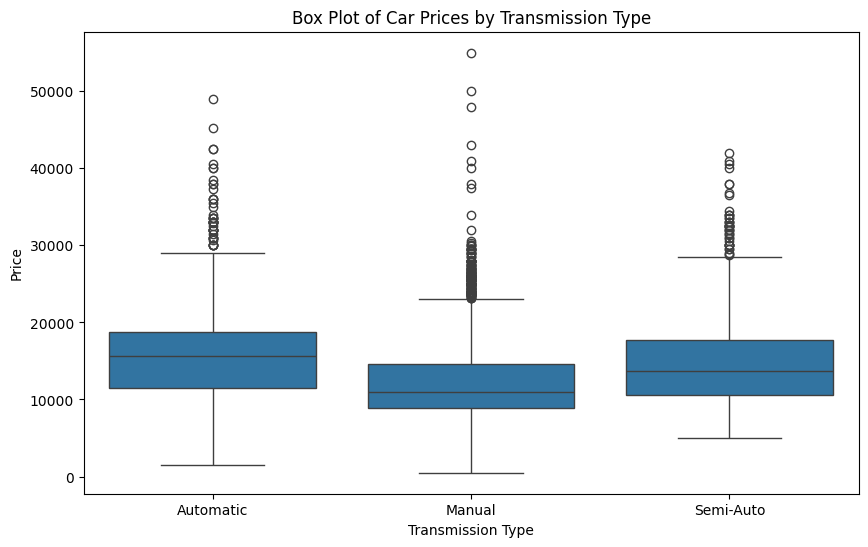

In [49]:
# Check data types of the columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (optional)
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='transmission', y='price', data=data)

# Set plot title and labels
plt.title('Box Plot of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Display the plot
plt.show()





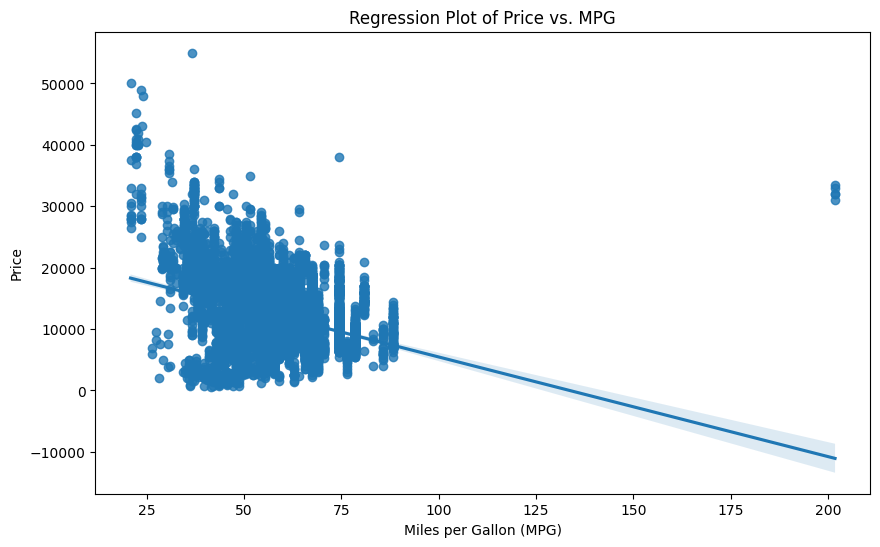

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (optional)
plt.figure(figsize=(10, 6))

# Create the regression plot
sns.regplot(x='mpg', y='price', data=data)

# Set plot title and labels
plt.title('Regression Plot of Price vs. MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Price')

# Display the plot
plt.show()





In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame
# Select features and target variable
X = data[['mpg']]  # Feature
y = data['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f'R² value: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')




R² value: 0.1325
Mean Squared Error (MSE): 19441984.6633


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame
# Select features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]  # Features
y = data['price']   # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² using the model's score method
r2 = model.score(X_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f'R² value: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')




R² value: 0.7257
Mean Squared Error (MSE): 6148224.5602


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame
# Select features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]  # Features
y = data['price']   # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Standard scaler
    ('poly', PolynomialFeatures(degree=2)),   # Polynomial features (degree 2)
    ('model', LinearRegression())              # Linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R² and MSE
r2 = pipeline.score(X_test, y_test)  # R² value
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error

# Print the results
print(f'R² value: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')





R² value: 0.7527
Mean Squared Error (MSE): 5543050.8668


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame
# Select features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]  # Features
y = data['price']   # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform polynomial transformation
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)         # Transform test data

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Set regularization parameter to 0.1
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the modified test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R² and MSE
r2 = ridge_model.score(X_test_poly, y_test)  # R² value
mse = mean_squared_error(y_test, y_pred)      # Mean Squared Error

# Print the results
print(f'R² value: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')





/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.24869e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R² value: 0.7525
Mean Squared Error (MSE): 5546814.7140


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Assuming 'data' is your DataFrame
# Select features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]  # Features
y = data['price']   # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform polynomial transformation
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)         # Transform test data

# Set up the parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge = Ridge()

# Set up Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the Grid Search model to the training data
grid_search.fit(X_train_poly, y_train)

# Get the best parameters and the best score
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Convert back to positive MSE

# Print the results
print(f'Optimal value of alpha: {best_alpha}')
print(f'Best MSE from cross-validation: {best_mse:.4f}')





/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.19099e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.8975e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.95412e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.96663e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.17723e-24): resu

Optimal value of alpha: 100
Best MSE from cross-validation: 5397645.2041


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
